___

In [1]:
# Import libraries to be used

# Directories/Files management
import os.path

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
## pd.set_option('display.max_rows', None) # It greatly slows down the output display and may freeze the kernel
import missingno as msno
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning:
# - Model selection:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, KFold, cross_val_score, StratifiedKFold, \
                                    GridSearchCV, RandomizedSearchCV
from sklearn.inspection import permutation_importance

# - Basic classes for custom-made transformers:
from sklearn.base import BaseEstimator, TransformerMixin

# - Transformers:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# - Pipeline:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# - Models:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance, plot_tree

# - Metrics:
from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, accuracy_score, \
                            confusion_matrix, classification_report, roc_curve, precision_recall_curve, \
                            roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve

# Objects storage:
from joblib import dump, load
import pickle

In [2]:
t0 = time.perf_counter() 

In [3]:
# Detect Operating System running and manage paths accordingly

root = os.getcwd()
if os.name == 'nt': # Windows
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\Desktop\TFM\notebooks\model


# Load the dataset

In [4]:
cols = [
    'MONTH',
#     'DAY_OF_MONTH',
    'DAY_OF_WEEK',
    'OP_UNIQUE_CARRIER',
#     'TAIL_NUM',
    'ORIGIN',
#     'ORIGIN_CITY_NAME',
#     'ORIGIN_STATE_ABR',
#     'ORIGIN_STATE_NM',
#     'WBAN_Origin_OTP',
    'DEST',
#     'DEST_CITY_NAME',
#     'DEST_STATE_ABR',
#     'DEST_STATE_NM',
#     'WBAN_Dest_OTP',
#     'CRS_DEP_TIME',
#     'DEP_TIME',
#     'DEP_DELAY',
#     'DEP_DEL15',
    'DEP_TIME_hour',
#     'TAXI_OUT',
#     'TAXI_IN',
    'TAXI_OUT_median',
    'TAXI_IN_median',
#     'CRS_ARR_TIME',
#     'ARR_TIME',
#     'ARR_DELAY',
    'ARR_DEL15', # → Target !!
    'ARR_TIME_hour',
#     'CANCELLED',
#     'CRS_ELAPSED_TIME',
    'DISTANCE',
#     'DISTANCE_GROUP',
#     'CARRIER_DELAY',
#     'WEATHER_DELAY',
#     'NAS_DELAY',
#     'SECURITY_DELAY',
#     'LATE_AIRCRAFT_DELAY',
    
#     'STATION_Origin',
#     'WMO_Origin',
#     'WBAN_Origin_LCD',
#     'LATITUDE_Origin',
#     'LONGITUDE_Origin',
    'HourlyAltimeterSetting_Origin',
    'HourlyDryBulbTemperature_Origin',
    'HourlyPrecipitation_Origin',
    'HourlyRelativeHumidity_Origin',
    'HourlySkyConditions_Origin',
    'HourlyVisibility_Origin',
#     'HourlyWindDirection_Origin',
    'HourlyWindGustSpeed_Origin',
    'HourlyWindSpeed_Origin',
#     'REM_Origin',
#     'STATION_Dest',
#     'WMO_Dest',
#     'WBAN_Dest_LCD',
#     'LATITUDE_Dest',
#     'LONGITUDE_Dest',
    'HourlyAltimeterSetting_Dest',
    'HourlyDryBulbTemperature_Dest',
    'HourlyPrecipitation_Dest',
    'HourlyRelativeHumidity_Dest',
    'HourlySkyConditions_Dest',
    'HourlyVisibility_Dest',
#     'HourlyWindDirection_Dest',
    'HourlyWindGustSpeed_Dest',
    'HourlyWindSpeed_Dest',
#     'REM_Dest'
]

In [5]:
cols_dtypes = {
    'MONTH' : 'string',
#     'DAY_OF_MONTH' : 'string',
    'DAY_OF_WEEK' : 'string',
    'OP_UNIQUE_CARRIER' : 'string',
#     'TAIL_NUM' : 'string',
    'ORIGIN' : 'string',
#     'ORIGIN_CITY_NAME' : 'string',
#     'ORIGIN_STATE_ABR' : 'string',
#     'ORIGIN_STATE_NM' : 'string',
#     'WBAN_Origin_OTP' : 'string',
    'DEST' : 'string',
#     'DEST_CITY_NAME' : 'string',
#     'DEST_STATE_ABR' : 'string',
#     'DEST_STATE_NM' : 'string',
#     'WBAN_Dest_OTP' : 'string',
#     'CRS_DEP_TIME' : 'string',
#     'DEP_TIME' : 'string',
#     'DEP_DELAY' : 'int32',
#     'DEP_DEL15' : 'int32',
    'DEP_TIME_hour' : 'string',
#     'TAXI_OUT' : 'int32',
#     'TAXI_IN' : 'int32',
    'TAXI_OUT_median' : 'int32',
    'TAXI_IN_median' : 'int32',
#     'CRS_ARR_TIME' : 'string',
#     'ARR_TIME' : 'string',
#     'ARR_DELAY' : 'int32',
    'ARR_DEL15' : 'int32', # → Target !!
    'ARR_TIME_hour' : 'string',
#     'CANCELLED' : 'string',
#     'CRS_ELAPSED_TIME' : 'int32',
    'DISTANCE' : 'int32',
#     'DISTANCE_GROUP' : 'string',
#     'CARRIER_DELAY' : 'int32',
#     'WEATHER_DELAY' : 'int32',
#     'NAS_DELAY' : 'int32',
#     'SECURITY_DELAY' : 'int32',
#     'LATE_AIRCRAFT_DELAY' : 'int32',

#     'STATION_Origin' : 'string',
#     'WMO_Origin' : 'string',
#     'WBAN_Origin_LCD' : 'string',
#     'LATITUDE_Origin' : 'float64',
#     'LONGITUDE_Origin' : 'float64',
    'HourlyAltimeterSetting_Origin' : 'float64',
    'HourlyDryBulbTemperature_Origin' : 'int32',
    'HourlyPrecipitation_Origin' : 'float64',
    'HourlyRelativeHumidity_Origin' : 'int32',
    'HourlySkyConditions_Origin' : 'string',
    'HourlyVisibility_Origin' : 'int32',
#     'HourlyWindDirection_Origin' : 'string',
    'HourlyWindGustSpeed_Origin' : 'int32',
    'HourlyWindSpeed_Origin' : 'int32',
#     'REM_Origin' : 'string',
#     'STATION_Dest' : 'string',
#     'WMO_Dest' : 'string',
#     'WBAN_Dest_LCD' : 'string',
#     'LATITUDE_Dest' : 'float64',
#     'LONGITUDE_Dest' : 'float64',
    'HourlyAltimeterSetting_Dest' : 'float64',
    'HourlyDryBulbTemperature_Dest' : 'int32',
    'HourlyPrecipitation_Dest' : 'float64',
    'HourlyRelativeHumidity_Dest' : 'int32',
    'HourlySkyConditions_Dest' : 'string',
    'HourlyVisibility_Dest' : 'int32',
#     'HourlyWindDirection_Dest' : 'string',
    'HourlyWindGustSpeed_Dest' : 'int32',
    'HourlyWindSpeed_Dest' : 'int32',
#     'REM_Dest' : 'string',
}

In [6]:
%%time

input_folder = '../../data/output/us_dot-noaa/'
file_name = "3_otp_lcd_2019.csv"

df_all = pd.read_csv(input_folder + file_name,
                     encoding='latin1',
#                      nrows=1e5,
                     usecols=cols,
                     dtype=cols_dtypes
                    )
df_all.sample(5)

Wall time: 1min 11s


,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_DEL15,ARR_TIME_hour,DISTANCE,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest
1800695,08,1,WN,DEN,LAS,12,12,5,0,13,628,30.09,74,0.0,38,FEW,10,20,11,29.820,106,0.00,10,FEW,10,0,5
3052601,01,2,AA,BOS,DCA,6,19,5,0,7,399,30.13,22,0.0,71,OVC,10,0,10,29.925,35,0.00,72,OVC,9,0,10
1134419,04,7,YX,PIT,MIA,6,14,7,0,9,1013,30.15,47,0.0,86,BKN,9,0,3,30.190,82,0.00,67,BKN,10,0,14
2136452,10,2,B6,BOS,DCA,14,16,4,1,15,399,30.07,58,0.0,72,OVC,10,0,15,29.810,62,0.02,96,OVC,2,0,0
6246407,12,2,UA,DEN,EUG,19,16,5,0,21,996,29.81,31,0.0,43,FEW,10,0,8,30.020,49,0.08,90,OVC,5,0,15


___

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200053 entries, 0 to 7200052
Data columns (total 27 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   MONTH                            string 
 1   DAY_OF_WEEK                      string 
 2   OP_UNIQUE_CARRIER                string 
 3   ORIGIN                           string 
 4   DEST                             string 
 5   DEP_TIME_hour                    string 
 6   TAXI_OUT_median                  int32  
 7   TAXI_IN_median                   int32  
 8   ARR_DEL15                        int32  
 9   ARR_TIME_hour                    string 
 10  DISTANCE                         int32  
 11  HourlyAltimeterSetting_Origin    float64
 12  HourlyDryBulbTemperature_Origin  int32  
 13  HourlyPrecipitation_Origin       float64
 14  HourlyRelativeHumidity_Origin    int32  
 15  HourlySkyConditions_Origin       string 
 16  HourlyVisibility_Origin          int32  
 17  HourlyWi

## Correlation Heatmap

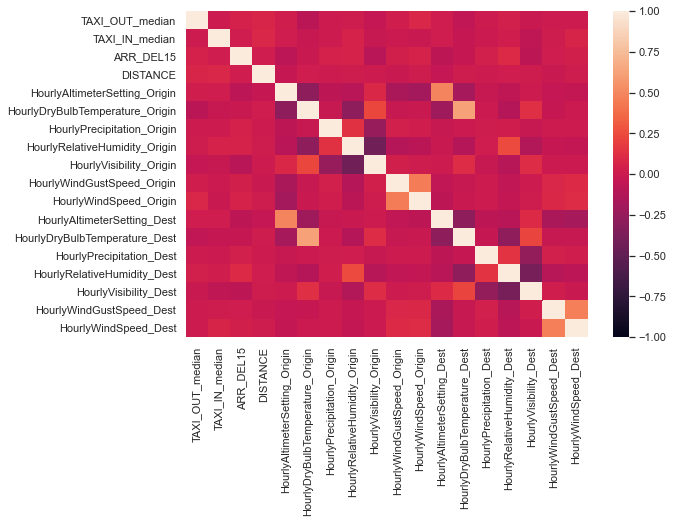

In [8]:
# Heatmap showing global correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=False, cbar=True, cmap=sns.cm.rocket);

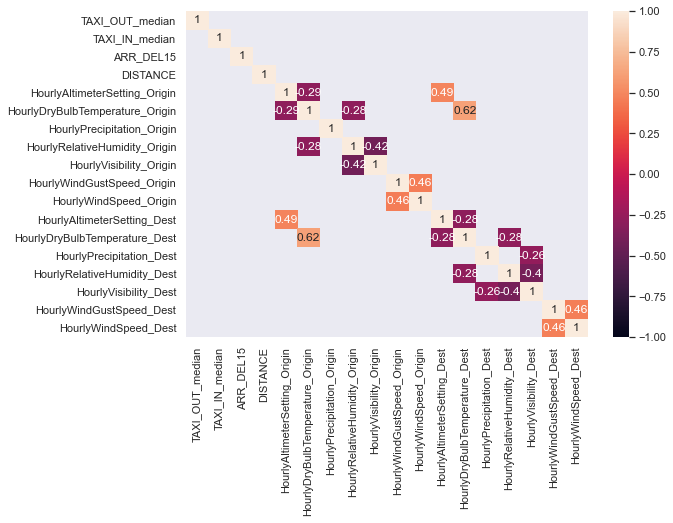

In [9]:
# Heatmap showing remarkable correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=True, cbar=True, cmap=sns.cm.rocket, mask=abs(df_all.corr()) < 0.25);

## Dataset overview

In [10]:
# For deterministic purposes, let's define a seed:
np.random.seed(0)

In [11]:
# For the initial runs, define a reasonably-sized sample:
# sample_length =  int(1e4)
# # Once everything is set up, use the entire dataset:
sample_length = len(df_all)

# Although the dataset is somehow imbalanced (80% on-time / 20% delayed), let's try to keep it as is for this test:
df = df_all.sample(sample_length)

# # Get dummies for the categorical features:
# df = pd.get_dummies(df)

print("On-time flights: {:7d} ({:5.2f}%)".format(len(df[df['ARR_DEL15'] == 0]), 100*len(df[df['ARR_DEL15'] == 0])/len(df)))
print("Delayed flights: {:7d} ({:5.2f}%)".format(len(df[df['ARR_DEL15'] == 1]), 100*len(df[df['ARR_DEL15'] == 1])/len(df)))

On-time flights: 5824288 (80.89%)
Delayed flights: 1375765 (19.11%)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7200053 entries, 3046636 to 4500015
Data columns (total 27 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   MONTH                            string 
 1   DAY_OF_WEEK                      string 
 2   OP_UNIQUE_CARRIER                string 
 3   ORIGIN                           string 
 4   DEST                             string 
 5   DEP_TIME_hour                    string 
 6   TAXI_OUT_median                  int32  
 7   TAXI_IN_median                   int32  
 8   ARR_DEL15                        int32  
 9   ARR_TIME_hour                    string 
 10  DISTANCE                         int32  
 11  HourlyAltimeterSetting_Origin    float64
 12  HourlyDryBulbTemperature_Origin  int32  
 13  HourlyPrecipitation_Origin       float64
 14  HourlyRelativeHumidity_Origin    int32  
 15  HourlySkyConditions_Origin       string 
 16  HourlyVisibility_Origin          int32  
 17  Ho

# Preprocessing

### Train / Test split
Break the dataset into three blocks:
1. Training (80%) → cross-validation
2. Test (20%) → final evaluation

In [13]:
# Separate input features from the target:
X = df.drop('ARR_DEL15', axis=1)
y = df['ARR_DEL15']

# Train-test split the data in a stratified way in accordance with target distribution:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5760042, 26), (1440011, 26), (5760042,), (1440011,))

In [14]:
def otp_describe(y_train, y_test):
    print("TRAIN:")
    print("On-time flights: {:7d} ({:5.2f}%)".format(len(y_train[y_train == 0]), 100*len(y_train[y_train == 0])/len(y_train)))
    print("Delayed flights: {:7d} ({:5.2f}%)".format(len(y_train[y_train == 1]), 100*len(y_train[y_train == 1])/len(y_train)))
    print("TEST:")
    print("On-time flights: {:7d} ({:5.2f}%)".format(len(y_test[y_test == 0]), 100*len(y_test[y_test == 0])/len(y_test)))
    print("Delayed flights: {:7d} ({:5.2f}%)".format(len(y_test[y_test == 1]), 100*len(y_test[y_test == 1])/len(y_test)))

otp_describe(y_train, y_test)

TRAIN:
On-time flights: 4659430 (80.89%)
Delayed flights: 1100612 (19.11%)
TEST:
On-time flights: 1164858 (80.89%)
Delayed flights:  275153 (19.11%)


# Production model: `XGBoost`

In [15]:
from xgboost import XGBClassifier

In [16]:
# Summarize classes distribution:
from collections import Counter

counter = Counter(y_train)
total_negative_examples = counter[0]
total_positive_examples = counter[1]

# A sensible default value to set for the scale_pos_weight hyperparameter is the inverse of the class distribution:
scale_pos_weight = total_negative_examples / total_positive_examples

print("TRAINING DATASET")
print("Total dataset:      {:7d} ({:6.2f}%)".format(len(X_train), 100*len(X_train)/len(X_train)))
print("On-time:            {:7d} ( {:5.2f}%)".format(total_negative_examples, 100*total_negative_examples/len(X_train)))
print("Delayed:            {:7d} ( {:5.2f}%)".format(total_positive_examples, 100*total_positive_examples/len(X_train)))
print("'scale_pos_weight' value: {:5.2f}".format(scale_pos_weight))

TRAINING DATASET
Total dataset:      5760042 (100.00%)
On-time:            4659430 ( 80.89%)
Delayed:            1100612 ( 19.11%)
'scale_pos_weight' value:  4.23


## Training

In [17]:
# Define the cross-validation folding strategy:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Define a basic classifier:
clf = XGBClassifier(use_label_encoder=False, verbosity=1, random_state=0, objective= 'binary:logistic',
                    booster='gbtree', tree_method='auto', num_boost_round = 10000, early_stopping_round=10,
                    scale_pos_weight=scale_pos_weight)

# Instantiate the basic target encoder:
from category_encoders.target_encoder import TargetEncoder
# te = TargetEncoder()
targetEncoder = TargetEncoder(verbose=0,
                              cols=X_train.select_dtypes(['string', 'category', 'object']).columns,
                              drop_invariant=False, return_df=True,
                              handle_missing='value', handle_unknown='value',
                              min_samples_leaf=1, smoothing=1.0) # Higher 'smoothing' value means stronger regularization

# CAUTION !! Issue experienced when columns had "String" dtypes: google "StringArray' object has no attribute 'tolist' #270"
X_train[X_train.select_dtypes('string').columns] = X_train[X_train.select_dtypes('string').columns].astype('object')
# X_train[X_train.select_dtypes('object').columns] = X_train[X_train.select_dtypes('object').columns].astype('string')

# Indicate numerical and categorical features:
num_attribs = X_train.select_dtypes('number').columns
cat_attribs = X_train.select_dtypes(['string', 'category', 'object']).columns

# Define what transformations shall apply to NUMERICAL columns:
# num_pipeline = Pipeline([
#                          ('imputer', SimpleImputer(strategy="median")),
#                          ('std_scaler', StandardScaler()),
#                         ])

# Define what transformations shall apply to CATEGORICAL columns:
cat_pipeline = Pipeline([
                         ('te', targetEncoder), # ('onehot', OneHotEncoder()),
                        ])

# Declare the combined pipeline:
full_pipeline = ColumnTransformer([
#                                    ("num", num_pipeline, num_attribs),
                                   ("cat", cat_pipeline, cat_attribs),
                                  ], remainder='passthrough')

# Define the model pipeline:
pipe = Pipeline([
                 ("preprocessing_pipe", full_pipeline),
                 ("clf", clf),
                ])

# Grid to serch for the hyperparameters:
xgb_pipe_grid = {
                 'clf__subsample' : [0.9],
                 'clf__reg_lambda' : [1],
                 'clf__reg_alpha' : [0.0001],
                 'clf__n_estimators' : [350],
                 'clf__min_child_weight' : [100],
                 'clf__max_depth' : [8],
                 'clf__learning_rate' : [0.05],
                 'clf__gamma' : [0.5],
                 'clf__colsample_bytree' : [0.7]
                }
# xgb_pipe_grid = {
#                  'clf__min_child_weight' : [100, 150, 200],
#                  'clf__gamma' : [0.5],
#                  'clf__subsample' : [0.9],
#                  'clf__colsample_bytree' : [0.7],
#                  'clf__max_depth' : [6, 7, 8, 9],
#                  'clf__learning_rate' : [0.05, 0.1, 0.15],
#                  'clf__n_estimators' : [200, 350, 500],
#                  'clf__reg_alpha' : [1e-4],
#                  'clf__reg_lambda' : [1]
#                 }
# xgb_pipe_grid = {
#                  'clf__min_child_weight' : [1, 10, 25, 50, 100, 150, 200],
#                  'clf__gamma' : [0.1, 0.5, 1, 1.5, 2, 5],
#                  'clf__subsample' : [0.6, 0.8, 1.0],
#                  'clf__colsample_bytree' : [0.6, 0.8, 1.0],
#                  'clf__max_depth' : [3, 4, 5, 6, 7, 8, 9],
#                  'clf__learning_rate' : [0.05, 0.1, 0.15],
#                  'clf__n_estimators' : [50, 100, 250, 300, 350, 400, 450, 500],
#                  'clf__reg_alpha' : [1e-6, 1e-5, 1e-4],
#                  'clf__reg_lambda' : [0.5, 1, 1.5]
#                 }



# Instantiate the grid search:
# from sklearn.model_selection import GridSearchCV
# xgb_pipe_cv = GridSearchCV(
#                            pipe,
#                            param_grid=xgb_pipe_grid,
#                            scoring='recall',
#                            n_jobs=-1,
#                            cv=skf,
#                            verbose=10
#                           )
from sklearn.model_selection import RandomizedSearchCV
xgb_pipe_cv = RandomizedSearchCV(
                                pipe,
                                param_distributions=xgb_pipe_grid,
                                n_iter=50,
                                scoring='recall',
                                n_jobs=-1,
                                cv=skf,
                                verbose=10
                               )

xgb_pipe_cv.fit(X_train, y_train)

xgb_pipe_cv.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.2min remaining:  6.4min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  4.3min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 151.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 151.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[22:24:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stopping_round, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:25:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 0, 0, ..., 0, 0, 1])

In [18]:
from sklearn import set_config

set_config(display='diagram')
xgb_pipe_cv

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing_pipe',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               Pipeline(steps=[('te',
                                                                                                TargetEncoder(cols=Index(['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME_hour', 'ARR_TIME_hour', 'HourlySkyCondition...
                                                            use_label_encoder=False,
                                                            validate_parameters=None,
                                                            verbosity=1))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'clf__colsample_bytree': [0.7],
                                        'clf__gamma': [0.5],
                                        'clf__learning_rate': [0.05],
                                        'clf__max_depth': [8],
                                        'clf__min_child_weight': [100],
                                        'clf__n_estimators': [350],
                                        'clf__reg_alpha': [0.0001],
                                        'clf__reg_lambda': [1],
                                        'clf__subsample': [0.9]},
                   scoring='recall', verbose=10)

In [19]:
import psutil

# gives a single float value
print("CPU:", psutil.cpu_percent())
print("RAM:", psutil.virtual_memory().percent)

CPU: 98.1
RAM: 42.5


In [20]:
cv_res = pd.DataFrame(xgb_pipe_cv.cv_results_)
cv_res.sort_values(by='rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__subsample,param_clf__reg_lambda,param_clf__reg_alpha,param_clf__n_estimators,param_clf__min_child_weight,param_clf__max_depth,param_clf__learning_rate,param_clf__gamma,param_clf__colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3679.786994,4372.062253,9.976018,12.218196,0.9,1,0.0001,350,100,8,0.05,0.5,0.7,"{'clf__subsample': 0.9, 'clf__reg_lambda': 1, ...",0.644208,NaN,0.646678,NaN,NaN,NaN,NaN,1


In [21]:
xgb_pipe_cv.best_estimator_

Pipeline(steps=[('preprocessing_pipe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('te',
                                                                   TargetEncoder(cols=Index(['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME_hour', 'ARR_TIME_hour', 'HourlySkyConditions_Origin',
       'HourlySkyConditions_Dest'],
      dtype='object')))]),
                                                  Index(['MONTH', 'DAY_OF_WEEK', 'OP_U...
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=8,
                               min_child_weight=100, missing=nan,
                               monotone_constraints='()', n_estimators=350,
                               n_jobs=4, num_boost_round=10000,
                               num_parallel_tree=1, random_state=0,
                               reg_alpha=0.0001, reg_lambda=1,
                               scale_pos_weight=4.233490094601913,
                               subsample=0.9, tree_method='auto',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=1))])

In [22]:
xgb_pipe_cv.best_score_

nan

In [23]:
xgb_pipe_cv.best_params_

{'clf__subsample': 0.9,
 'clf__reg_lambda': 1,
 'clf__reg_alpha': 0.0001,
 'clf__n_estimators': 350,
 'clf__min_child_weight': 100,
 'clf__max_depth': 8,
 'clf__learning_rate': 0.05,
 'clf__gamma': 0.5,
 'clf__colsample_bytree': 0.7}

In [24]:
xgb_pipe_cv.best_index_

0

In [25]:
xgb_pipe_cv.scorer_

make_scorer(recall_score, average=binary)

In [26]:
xgb_pipe_cv.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing_pipe',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               Pipeline(steps=[('te',
                                                                                                TargetEncoder(cols=Index(['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME_hour', 'ARR_TIME_hour', 'HourlySkyCondition...
                                                            use_label_encoder=False,
                                                            validate_parameters=None,
                                                            verbosity=1))]),
                   n_iter=50, n

In [27]:
xgb_pipe_cv.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [28]:
xgb_pipe_cv.predict_proba(X_test)

array([[0.5904248 , 0.4095752 ],
       [0.86863893, 0.13136105],
       [0.72614706, 0.2738529 ],
       ...,
       [0.50648314, 0.49351686],
       [0.6395689 , 0.36043105],
       [0.39451045, 0.60548955]], dtype=float32)

In [29]:
model = xgb_pipe_cv.best_estimator_
model

Pipeline(steps=[('preprocessing_pipe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('te',
                                                                   TargetEncoder(cols=Index(['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME_hour', 'ARR_TIME_hour', 'HourlySkyConditions_Origin',
       'HourlySkyConditions_Dest'],
      dtype='object')))]),
                                                  Index(['MONTH', 'DAY_OF_WEEK', 'OP_U...
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=8,
                               min_child_weight=100, missing=nan,
                               monotone_constraints='()', n_estimators=350,
                               n_jobs=4, num_boost_round=10000,
                               num_parallel_tree=1, random_state=0,
                               reg_alpha=0.0001, reg_lambda=1,
                               scale_pos_weight=4.233490094601913,
                               subsample=0.9, tree_method='auto',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=1))])

## Evaluation

### Additional metrics results

In [30]:
# Evaluate the model's metrics:

from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, accuracy_score, \
                            confusion_matrix, classification_report, roc_curve, precision_recall_curve, \
                            roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve

def clf_metrics(classifier, X_test, y_test, y_pred):
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Normalized confusion matrix:\n", confusion_matrix(y_test, y_pred, normalize='true'), '\n')
    print(classification_report(y_test, y_pred, target_names=['on-time', 'delayed']))
    print("F-beta (ß=2) = {:6.3f}".format(fbeta_score(y_test, y_pred, beta=2)))   
    print("F1 =           {:6.3f}".format(f1_score(y_test, y_pred)))   
    print("Recall =       {:6.3f}".format(recall_score(y_test, y_pred)))   
    print("Precision =    {:6.3f}".format(precision_score(y_test, y_pred)))   
    print("Accuracy =     {:6.3f}".format(accuracy_score(y_test, y_pred)))

### Test

In [31]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [32]:
print("-+-+-+ TRAINING dataset +-+-+-\n")
clf_metrics(model, X_train, y_train, y_train_pred)
print("-------------------------------------------------------\n")
print("-+-+-+ TEST dataset: +-+-+-\n")
clf_metrics(model, X_test, y_test, y_test_pred)

-+-+-+ TRAINING dataset +-+-+-

Confusion matrix:
 [[3261598 1397832]
 [ 379962  720650]]
Normalized confusion matrix:
 [[0.69999936 0.30000064]
 [0.34522793 0.65477207]] 

              precision    recall  f1-score   support

     on-time       0.90      0.70      0.79   4659430
     delayed       0.34      0.65      0.45   1100612

    accuracy                           0.69   5760042
   macro avg       0.62      0.68      0.62   5760042
weighted avg       0.79      0.69      0.72   5760042

F-beta (ß=2) =  0.553
F1 =            0.448
Recall =        0.655
Precision =     0.340
Accuracy =      0.691
-------------------------------------------------------

-+-+-+ TEST dataset: +-+-+-

Confusion matrix:
 [[812681 352177]
 [ 97053 178100]]
Normalized confusion matrix:
 [[0.69766529 0.30233471]
 [0.35272376 0.64727624]] 

              precision    recall  f1-score   support

     on-time       0.89      0.70      0.78   1164858
     delayed       0.34      0.65      0.44    275153

   

### ROC curve

In [33]:
y_train_probabilities = model.predict_proba(X_train)[:,1]
y_test_probabilities = model.predict_proba(X_test)[:,1]
y_test_probabilities[:10]

array([0.4095752 , 0.13136105, 0.2738529 , 0.36642787, 0.21218653,
       0.5500075 , 0.3392435 , 0.41032758, 0.5410757 , 0.69336814],
      dtype=float32)

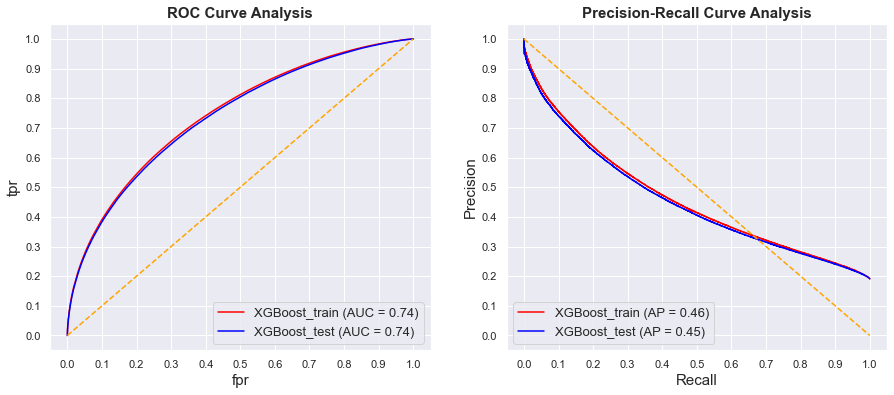

In [34]:
# Plot the figure:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
       
plot_roc_curve(model, X_train, y_train, color='red', name='XGBoost_train', ax=ax[0])
plot_roc_curve(model, X_test, y_test, color='blue', name='XGBoost_test', ax=ax[0])
ax[0].plot([0,1], [0,1], color='orange', linestyle='--')

ax[0].set_xticks(np.arange(0.0, 1.1, step=0.1))
ax[0].set_xlabel("fpr", fontsize=15)

ax[0].set_yticks(np.arange(0.0, 1.1, step=0.1))
ax[0].set_ylabel("tpr", fontsize=15)

ax[0].set_title('ROC Curve Analysis', fontweight='bold', fontsize=15)
ax[0].legend(prop={'size':13}, loc='lower right')


plot_precision_recall_curve(model, X_train, y_train, color='red', name='XGBoost_train', ax=ax[1])
plot_precision_recall_curve(model, X_test, y_test, color='blue', name='XGBoost_test', ax=ax[1])
ax[1].plot([0,1], [1,0], color='orange', linestyle='--')

ax[1].set_xticks(np.arange(0.0, 1.1, step=0.1))
ax[1].set_xlabel("Recall", fontsize=15)

ax[1].set_yticks(np.arange(0.0, 1.1, step=0.1))
ax[1].set_ylabel("Precision", fontsize=15)

ax[1].set_title('Precision-Recall Curve Analysis', fontweight='bold', fontsize=15)
ax[1].legend(prop={'size':13}, loc='lower left')

In [35]:
t1 = time.perf_counter() - t0
print("Time elapsed: {:2.0f}h {:2.0f}min {:2.0f}s".format(t1//3600, (t1%3600)//60, (t1%3600)%60))

Time elapsed:  4h 19min 32s


In [36]:
import psutil

# gives a single float value
print("CPU:", psutil.cpu_percent())
print("RAM:", psutil.virtual_memory().percent)

CPU: 73.0
RAM: 48.4


## Feature importance analysis

In [37]:
transformer = model[:-1]
clf = model.named_steps['clf']

X_test_categTransformed_df = pd.DataFrame(transformer.transform(X_test)[:, 0:9],
                                          columns=cat_attribs, index=X_test.index)
X_test_transformed = pd.concat([X_test_categTransformed_df, X_test[num_attribs]], axis=1)
X_test_transformed = X_test_transformed[X.columns]
X_test_transformed

,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_TIME_hour,DISTANCE,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest
4025560,0.203230,0.187341,0.175138,0.215538,0.202783,0.216778,18,9,0.205905,266,30.36,42,0.0,65,0.210787,10,0,0,30.330,51,0.0,83,0.210328,9,0,14
4092176,0.206686,0.199943,0.175690,0.194632,0.191495,0.097364,9,4,0.093702,302,29.92,82,0.0,82,0.162082,10,0,3,30.020,83,0.0,82,0.191470,10,0,8
4144741,0.166527,0.193357,0.211218,0.201224,0.239949,0.132920,18,7,0.128292,399,30.29,67,0.0,73,0.210787,10,0,5,30.355,65,0.0,52,0.210328,9,0,13
2101069,0.166527,0.199943,0.188297,0.185936,0.154942,0.121289,13,6,0.112237,119,29.84,43,0.0,80,0.210787,10,22,10,29.790,37,0.0,79,0.210328,10,33,16
366778,0.166527,0.197904,0.144877,0.203359,0.141877,0.182829,14,8,0.171102,545,30.04,85,0.0,63,0.195033,10,0,15,30.090,78,0.0,37,0.191470,10,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860275,0.182505,0.187341,0.197953,0.164617,0.187192,0.191989,13,6,0.205905,935,30.06,77,0.0,66,0.153981,10,0,10,30.140,61,0.0,38,0.191470,10,0,10
6326813,0.182505,0.179067,0.144877,0.183860,0.152793,0.187207,14,7,0.111150,1749,30.00,52,0.0,72,0.162082,10,0,5,30.070,46,0.0,63,0.210328,10,0,6
3343931,0.203230,0.199943,0.188297,0.190369,0.152793,0.251337,14,9,0.250842,425,29.75,73,0.0,66,0.162082,10,0,13,29.930,58,0.0,65,0.210328,8,0,5
2801043,0.206686,0.197904,0.144877,0.156661,0.187981,0.143077,15,9,0.137651,1947,30.10,83,0.0,72,0.195033,10,0,7,29.960,76,0.0,60,0.163726,8,0,10


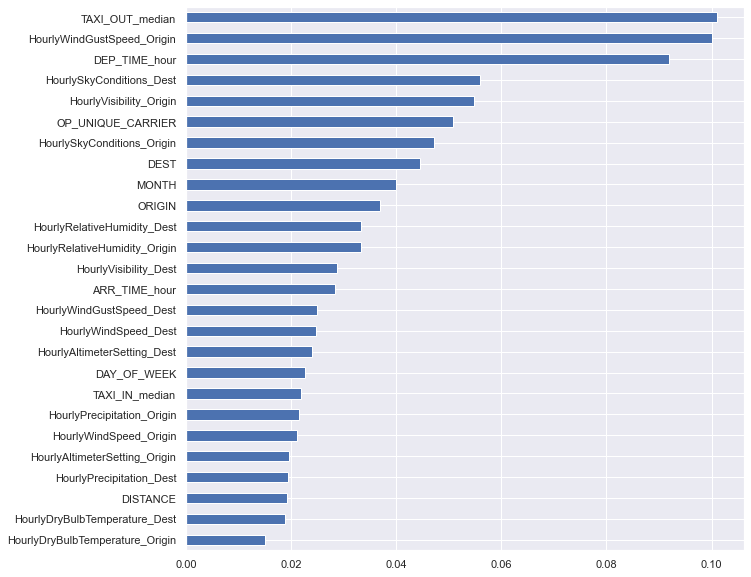

In [38]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nsmallest(X.shape[1]).plot(kind='barh', figsize=(10,10));

___

## Save the model

In [39]:
from joblib import dump, load

# Save model to file:
dump(model, "XGBoost_pipeline_model.joblib.dat")
print("Saved model to: XGBoost_pipeline_model.joblib.dat")

Saved model to: XGBoost_pipeline_model.joblib.dat


In [40]:
# Load model from file:
loaded_model = load("XGBoost_pipeline_model.joblib.dat")
print("Loaded model from: XGBoost_pipeline_model.joblib.dat")

Loaded model from: XGBoost_pipeline_model.joblib.dat


In [41]:
# Make predictions for test data
predictions = loaded_model.predict(X_test)

# Evaluate predictions:
recall = recall_score(y_test, predictions)
print("Loaded model recall: {:6.3f}".format(recall))

Loaded model recall:  0.647


___